# Clustering

...

In [1]:
import numpy as np
import time
import os, sys
import matplotlib.pyplot as plt
import seaborn as sns
from ase.io import read
from tqdm import tqdm

In [2]:
sys.path.append('../../')

In [3]:
from src import myTools, plotTools

In [4]:
def make_colors(clust, mode='tab10'):
    if np.min(clust) == -1:
        N = np.unique(clust).shape[0] - 1
        colors = [(0,0,0)] + sns.color_palette(mode, N)
    else:
        N = np.unique(clust).shape[0]
        colors = sns.color_palette(mode, N)
    return colors

## Data

In [5]:
embb = 'umapSOAPdist'
rcut = 'rcut4.5'
sysdir_path = '../2.dimreduction/dimred_data/'
sysname = f'{embb}_{rcut}_n_Z1_Z3_Nframe1000every5.npy'

In [6]:
X = np.load(sysdir_path+sysname)
X.shape

(22800, 2)

## HDBSCAN

Python library [hdbscan](https://hdbscan.readthedocs.io/en/latest/index.html)

Important hyperparameters:
- `min_cluster_size` :  the smallest size grouping that you wish to consider a cluster
- `min_sample` : 
- `cluster_selection_epsilon` : 

In [7]:
import hdbscan

In [8]:
clustDict = dict(
    min_cluster_size=15,
    min_samples=15,
    cluster_selection_epsilon=0.2,
    alpha=1.0
)

### Parameters search

In [9]:
param_search = [5,10,15,20,25,50,100]

0 {'min_cluster_size': 5, 'min_samples': 15, 'cluster_selection_epsilon': 0.2, 'alpha': 1.0}
1 {'min_cluster_size': 10, 'min_samples': 15, 'cluster_selection_epsilon': 0.2, 'alpha': 1.0}
2 {'min_cluster_size': 15, 'min_samples': 15, 'cluster_selection_epsilon': 0.2, 'alpha': 1.0}
3 {'min_cluster_size': 20, 'min_samples': 15, 'cluster_selection_epsilon': 0.2, 'alpha': 1.0}
4 {'min_cluster_size': 25, 'min_samples': 15, 'cluster_selection_epsilon': 0.2, 'alpha': 1.0}
5 {'min_cluster_size': 50, 'min_samples': 15, 'cluster_selection_epsilon': 0.2, 'alpha': 1.0}
6 {'min_cluster_size': 100, 'min_samples': 15, 'cluster_selection_epsilon': 0.2, 'alpha': 1.0}


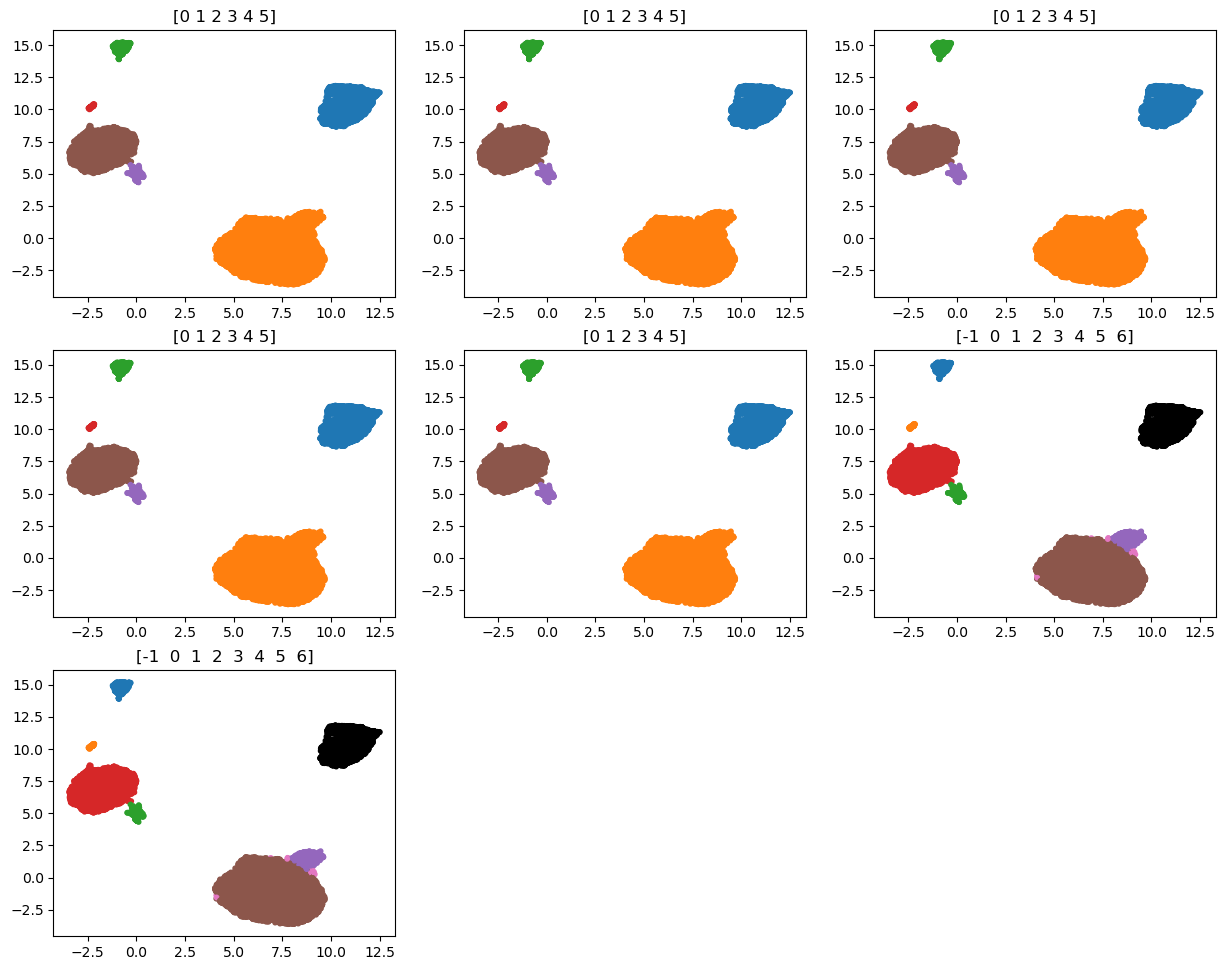

In [10]:
fig, ax = plotTools.get_axes(len(param_search),res=100)

for i,prmt in enumerate(param_search):
    
    clustDict.update(min_cluster_size=prmt)
    clustModel = hdbscan.HDBSCAN(**clustDict)
    clustModel.fit(X)
    labels = clustModel.labels_
    colors = make_colors(labels)
    
    print(i,clustDict)
    
    ax[i].scatter(*X.T, color=np.array(colors)[labels], s=10)
    ax[i].set_title(f"{np.unique(labels)}")

### Final value

In [11]:
# lpca approved
# clustDict = {'min_cluster_size': 15}

# umap approved
clustDict = {'min_cluster_size': 100, 
             'min_samples': 15, 
             'cluster_selection_epsilon': 0.2, 
             'alpha': 1.0}

In [12]:
clustModel = hdbscan.HDBSCAN(**clustDict)
clustModel.fit(X)
labels = clustModel.labels_

labels = labels +1

colors = make_colors(labels)

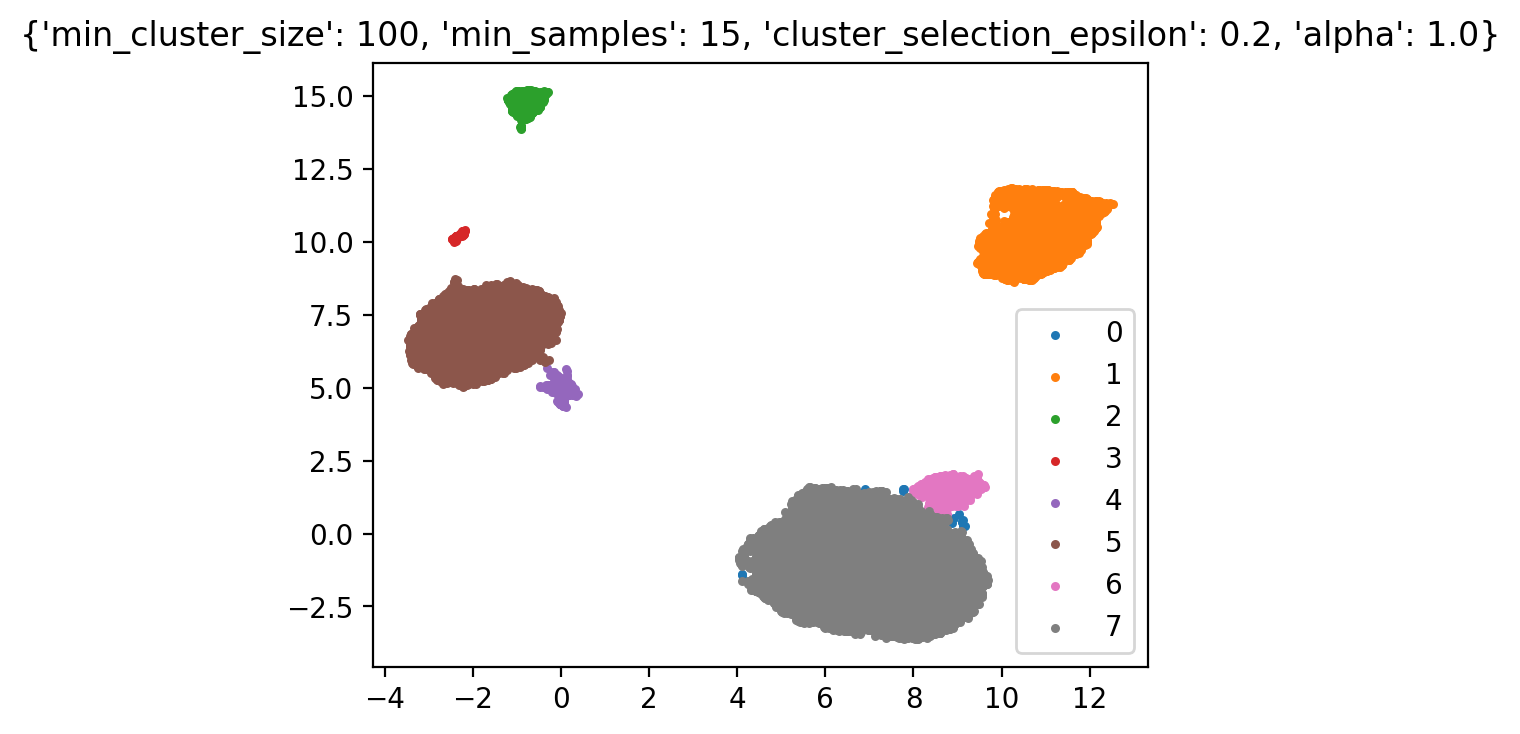

In [13]:
fig, ax = plotTools.get_axes(1)
for colo in np.unique(labels):
    mask = labels == colo
    ax.scatter(*X[mask].T, 
               color=colors[colo], 
               s=5, label=colo)
ax.set_title(f"{clustDict}")
# plotTools.remove_frame(ax)
ax.legend()
# fig.savefig('hdbscan_umapSOAPdist_soapRcut45_finer.png')

In [14]:
print(np.unique(labels), np.bincount(labels))

[0 1 2 3 4 5 6 7] [   15  3651   741   131   245  5966   747 11304]


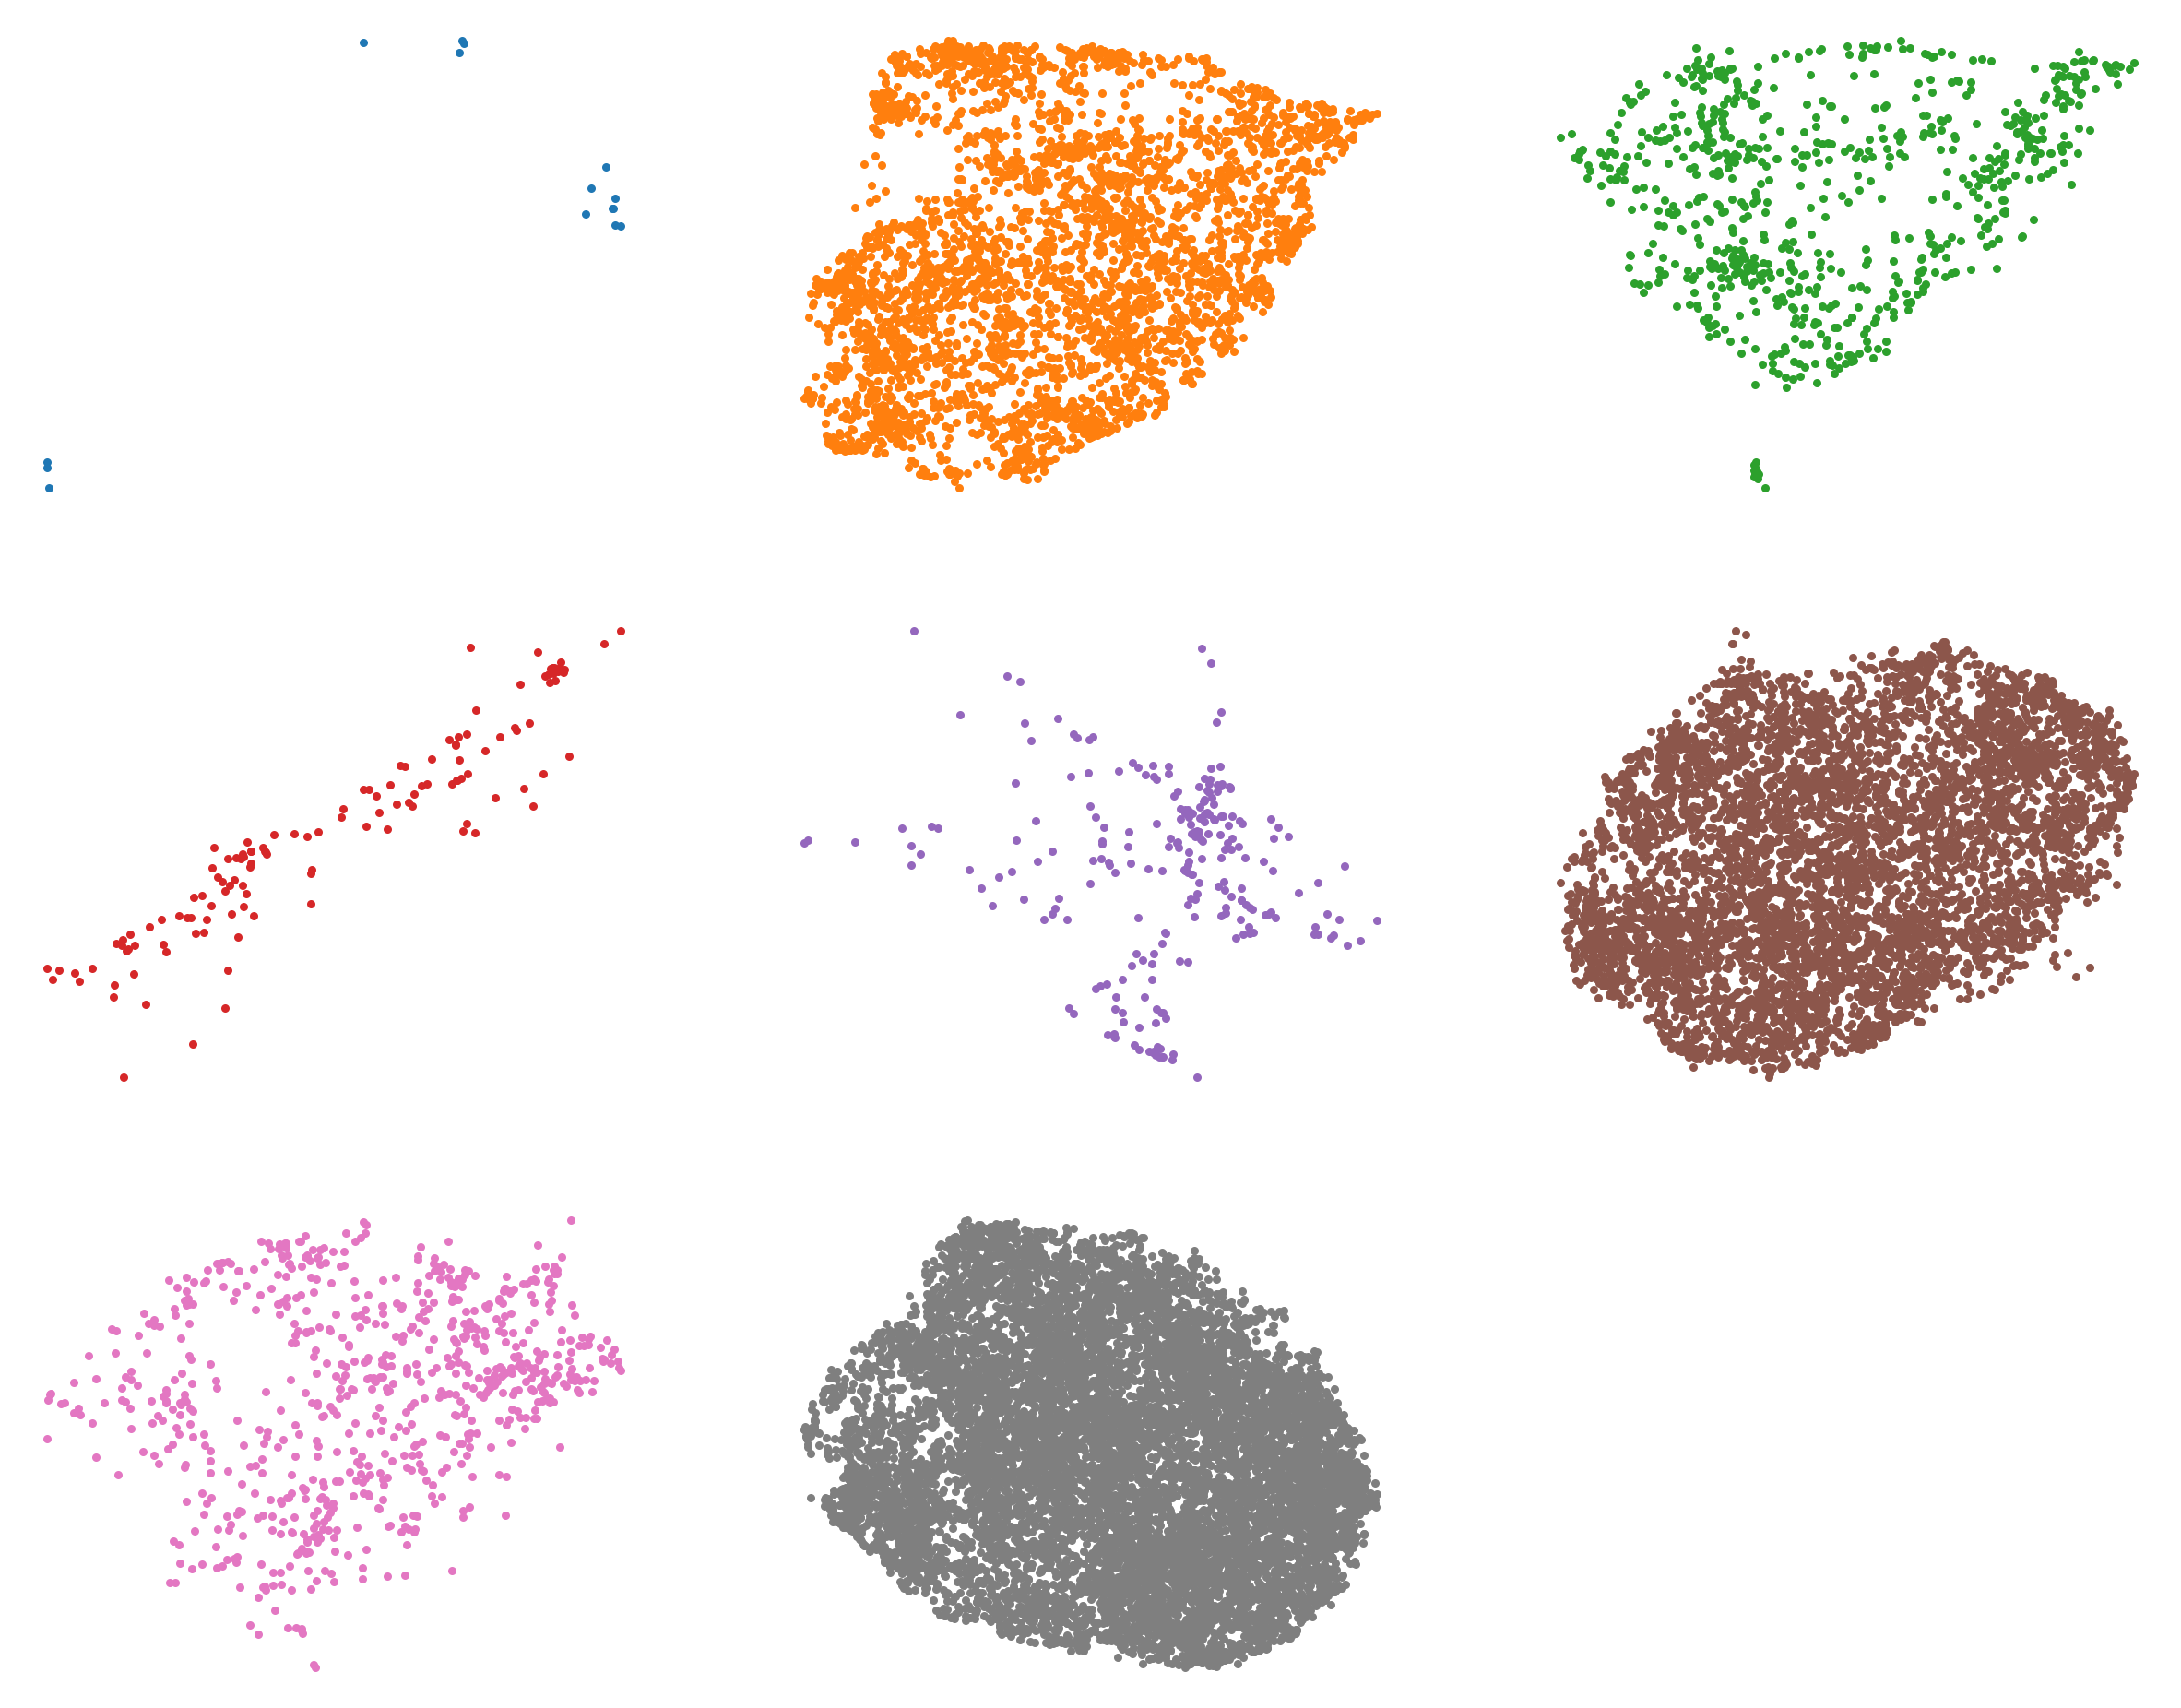

In [15]:
fig, ax = plotTools.get_axes(len(np.unique(labels)))
for i,colo in enumerate(np.unique(labels)):
    mask = labels == colo
    ax[i].scatter(*X[mask].T, 
                  color=colors[colo], 
                  s=5, label=colo)
    plotTools.remove_frame(ax[i])
# fig.savefig('hdbscan_umapSOAPdist_soapRcut45_clwise_finer.png')

### Noise correction

Is this needed?

### UMAP cluster on PCA

In [16]:
Xpca = np.load('../2.dimreduction/dimred_data/lpca_rcut4.5_n_Z1_Z3_Nframe1000every5.npy')[:,:2]
Xpca.shape

(22800, 2)

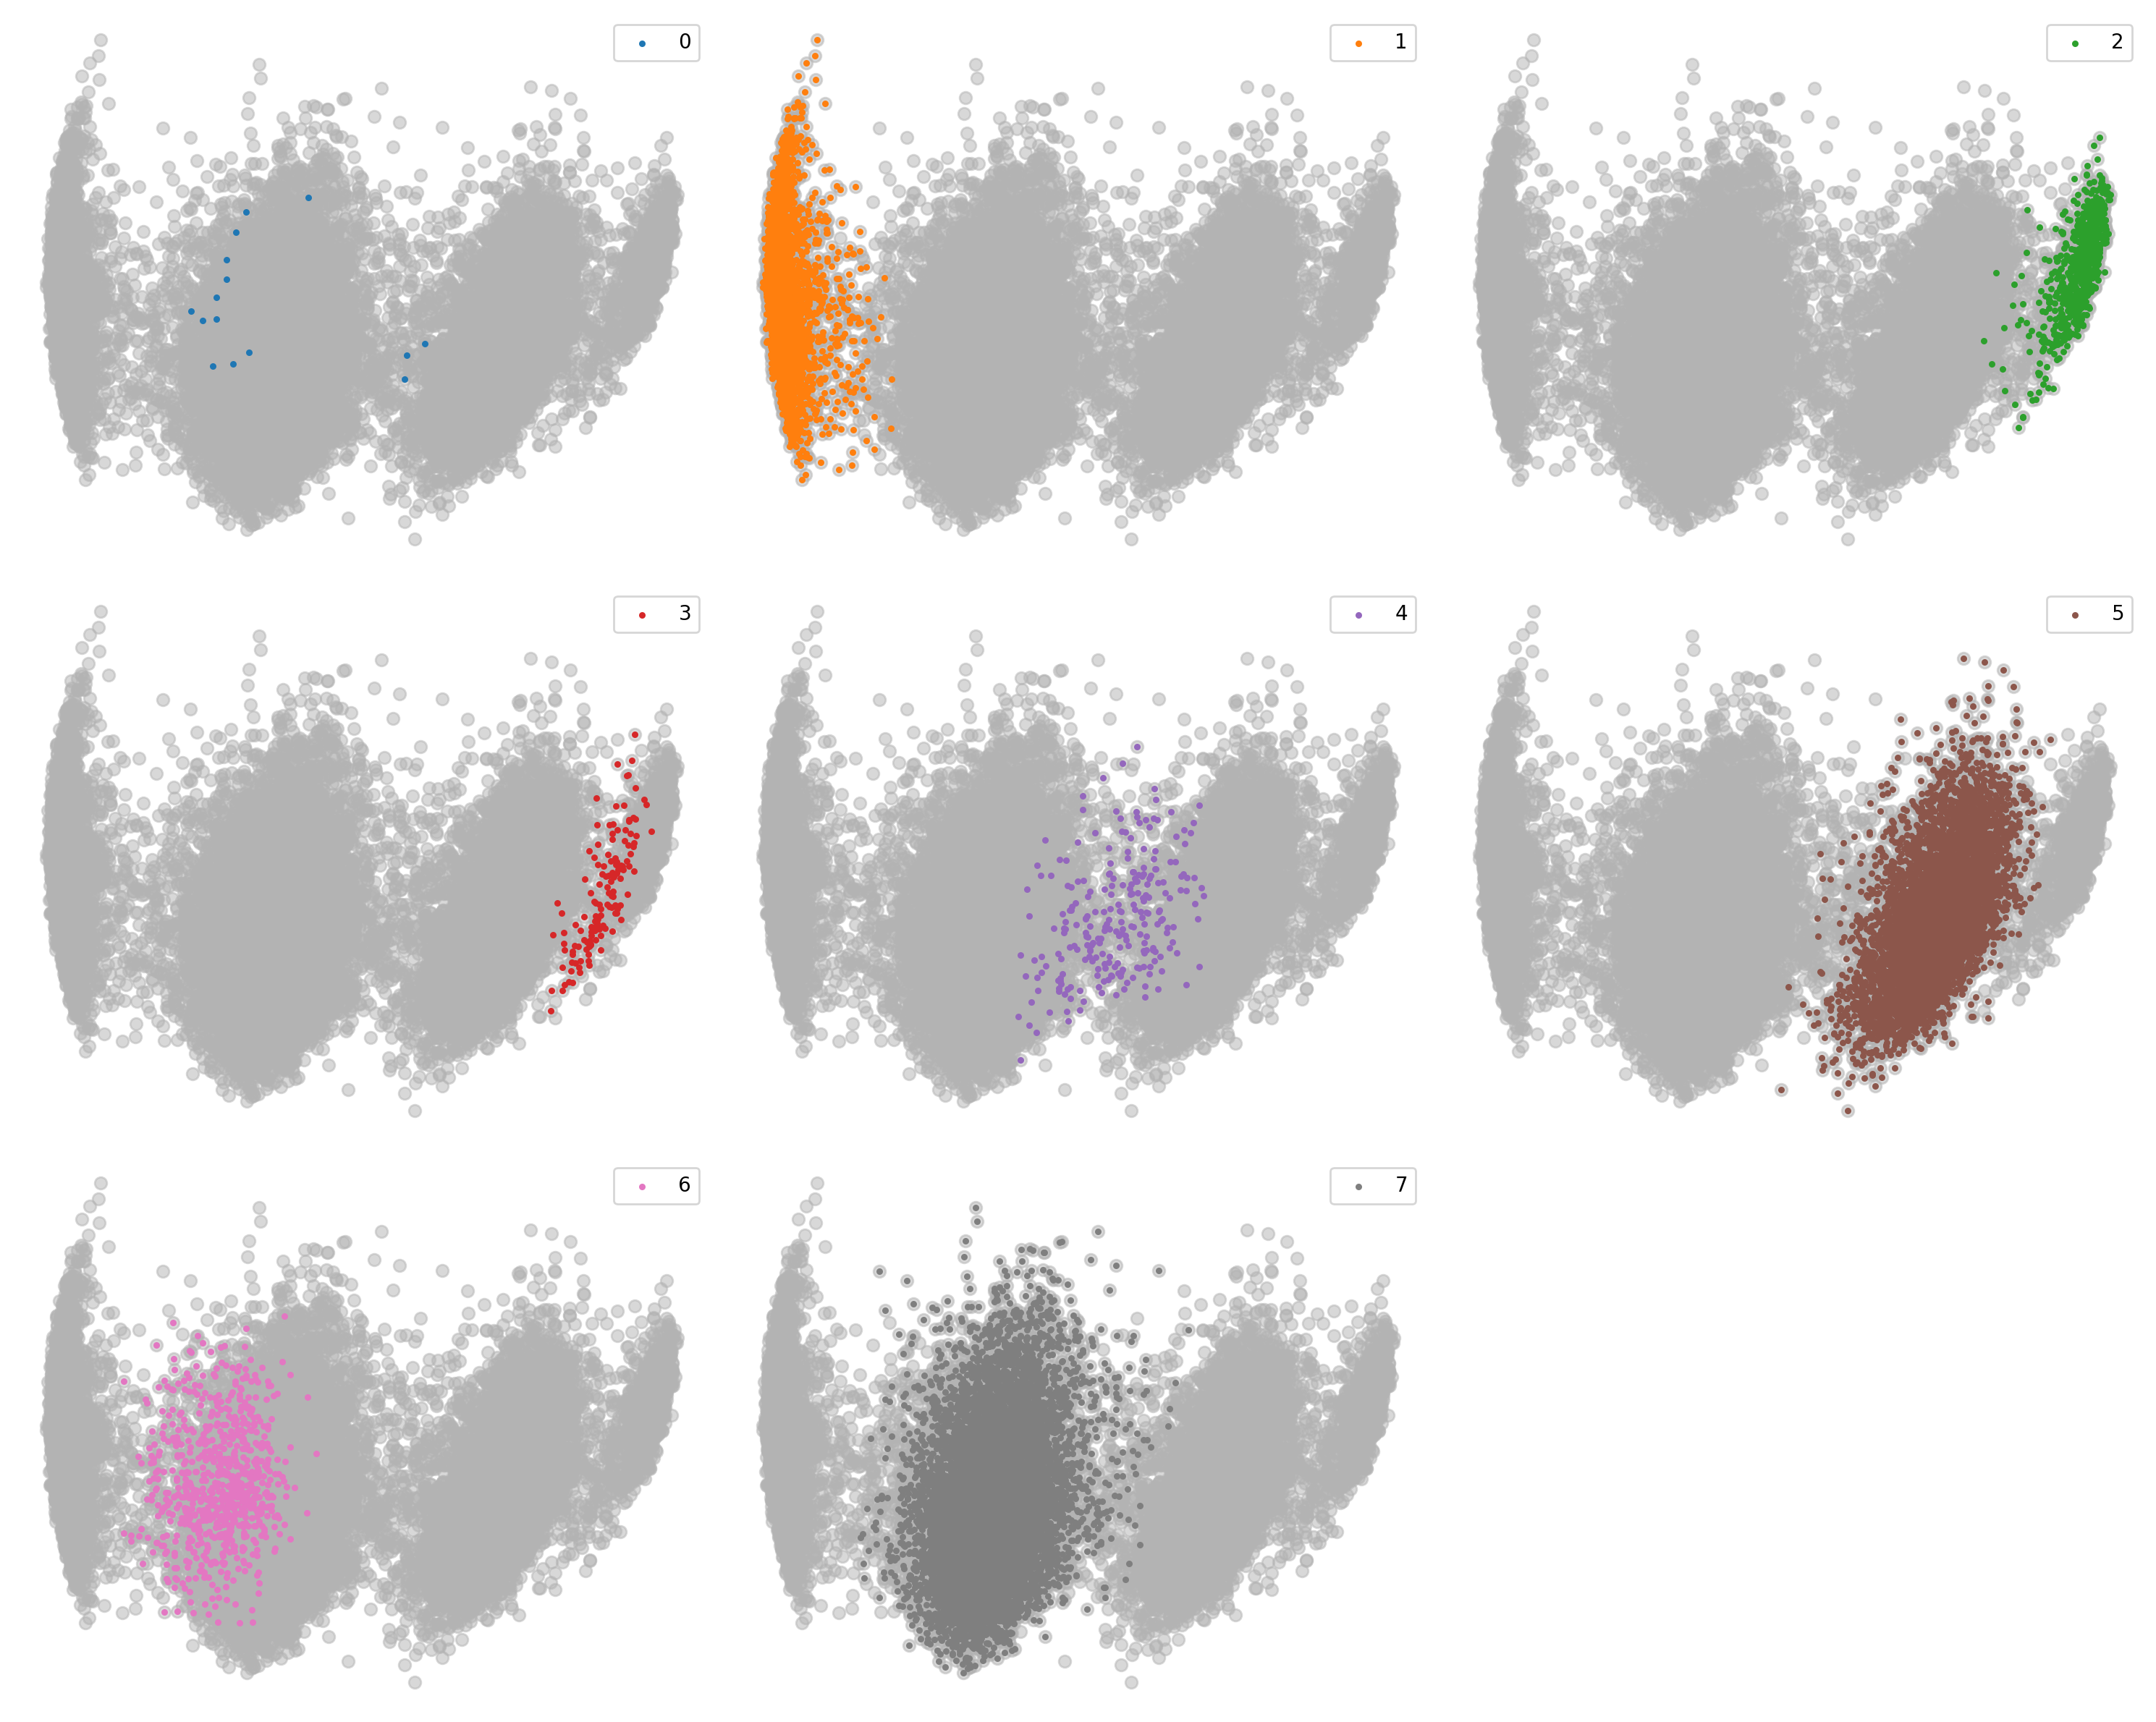

In [17]:
fig, ax = plotTools.get_axes(len(np.unique(labels)))

for i,colo in enumerate(np.unique(labels)):
    mask = labels == colo
    ax[i].scatter(*Xpca.T, alpha=0.5, c='0.7')
    ax[i].scatter(*Xpca[mask].T, 
                  color=colors[colo], 
                  s=5, label=colo)
    plotTools.remove_frame(ax[i])
    ax[i].legend()
fig.tight_layout()
# fig.savefig('hdbscan_umapSOAPdist_soapRcut45_clwise_on_lpca.png')

# Save results

In [27]:
np.savetxt(f'hdbscan_umapSOAPdist_soapRcut45_finer.labels', labels)